Ensamble Model: Voting Classifier

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [62]:
df_white_wine = pd.read_csv("white_wine.csv")
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [63]:
df_white_wine['quality'] = np.where(df_white_wine['quality'] > 6.0, 1, 0)
df_white_wine.dropna(inplace=True)
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [64]:
data_classification = df_white_wine[['density', 'alcohol', 'quality']].copy()
data_classification.head()

,density,alcohol,quality
0,1.0010,8.8,0
1,0.9940,9.5,0
2,0.9951,10.1,0
3,0.9956,9.9,0
4,0.9956,9.9,0


In [65]:
X = data_classification[['density', 'alcohol']]
y = data_classification['quality']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020, stratify=y)

In [67]:
LogRegModel = LogisticRegression().fit(X= X_train, y = y_train)
DTCModel = DecisionTreeClassifier().fit(X= X_train, y = y_train)
KNNModel = KNeighborsClassifier().fit(X= X_train, y = y_train)
RFCModel = RandomForestClassifier().fit(X= X_train, y = y_train)
NNModel = MLPClassifier().fit(X= X_train, y = y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [68]:
estimators = [LogRegModel, DTCModel, KNNModel, RFCModel, NNModel]

In [69]:
for model in estimators:
    y_pred = model.predict(X_test)
    print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        84
           1       0.73      0.40      0.52        20

    accuracy                           0.86       104
   macro avg       0.80      0.68      0.72       104
weighted avg       0.84      0.86      0.84       104

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        84
           1       0.95      0.95      0.95        20

    accuracy                           0.98       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.98      0.98      0.98       104

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        84
           1       0.68      0.75      0.71        20

    accuracy                           0.88       104
   macro avg       0.81      0.83      0.82       104
weighted avg       0.89      0.88      0.89       104

              preci

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
from sklearn.ensemble import VotingClassifier

VCModel = VotingClassifier(
    estimators=[('LogReg', LogRegModel), ('DecisionTree', DTCModel), ('KNN', KNNModel), ('RandomForest', RFCModel), ('NeuralNetwork', NNModel)]
)

VCModel.fit(X=X_train, y=y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('LogReg', LogisticRegression()),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier()),
                             ('RandomForest', RandomForestClassifier()),
                             ('NeuralNetwork', MLPClassifier())])

In [71]:
y_pred = VCModel.predict(X_test)
print(classification_report(y_true = y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        84
           1       1.00      0.75      0.86        20

    accuracy                           0.95       104
   macro avg       0.97      0.88      0.91       104
weighted avg       0.95      0.95      0.95       104



-------------------

Excercise

In [72]:
VCModel_1 = VotingClassifier(
    estimators=[('LogReg', LogRegModel), ('DecisionTree', DTCModel), ('KNN', KNNModel), ('RandomForest', RFCModel), ('NeuralNetwork', NNModel)],
    voting='hard',
    verbose=True
)

VCModel_1.fit(X=X_train, y=y_train)

[Voting] ................... (1 of 5) Processing LogReg, total=   0.0s
[Voting] ............. (2 of 5) Processing DecisionTree, total=   0.0s
[Voting] ...................... (3 of 5) Processing KNN, total=   0.0s
[Voting] ............. (4 of 5) Processing RandomForest, total=   0.1s
[Voting] ............ (5 of 5) Processing NeuralNetwork, total=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('LogReg', LogisticRegression()),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier()),
                             ('RandomForest', RandomForestClassifier()),
                             ('NeuralNetwork', MLPClassifier())],
                 verbose=True)

In [73]:
y_pred = VCModel_1.predict(X_test)
print(classification_report(y_true = y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        84
           1       1.00      0.75      0.86        20

    accuracy                           0.95       104
   macro avg       0.97      0.88      0.91       104
weighted avg       0.95      0.95      0.95       104



In [74]:
VCModel_2 = VotingClassifier(
    estimators=[('LogReg', LogRegModel), ('DecisionTree', DTCModel), ('KNN', KNNModel), ('RandomForest', RFCModel), ('NeuralNetwork', NNModel)],
    voting='soft',
    verbose=True
)

VCModel_2.fit(X=X_train, y=y_train)

[Voting] ................... (1 of 5) Processing LogReg, total=   0.0s
[Voting] ............. (2 of 5) Processing DecisionTree, total=   0.0s
[Voting] ...................... (3 of 5) Processing KNN, total=   0.0s
[Voting] ............. (4 of 5) Processing RandomForest, total=   0.1s
[Voting] ............ (5 of 5) Processing NeuralNetwork, total=   0.0s


VotingClassifier(estimators=[('LogReg', LogisticRegression()),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier()),
                             ('RandomForest', RandomForestClassifier()),
                             ('NeuralNetwork', MLPClassifier())],
                 verbose=True, voting='soft')

In [75]:
y_pred = VCModel_2.predict(X_test)
print(classification_report(y_true = y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        84
           1       1.00      0.85      0.92        20

    accuracy                           0.97       104
   macro avg       0.98      0.93      0.95       104
weighted avg       0.97      0.97      0.97       104



---------------------------

Ensamble Model: Stacking Classifier

In [76]:
from sklearn.ensemble import StackingClassifier, StackingRegressor

In [77]:
SCModel = StackingClassifier(
    estimators= [('DecisionTree', DTCModel), ('KNN', KNNModel), ('RandomForest', RFCModel), ('NeuralNetwork', NNModel)],
    final_estimator=LogisticRegression()
)

SCModel.fit(X=X_train, y=y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


StackingClassifier(estimators=[('DecisionTree', DecisionTreeClassifier()),
                               ('KNN', KNeighborsClassifier()),
                               ('RandomForest', RandomForestClassifier()),
                               ('NeuralNetwork', MLPClassifier())],
                   final_estimator=LogisticRegression())

In [78]:
y_pred = SCModel.predict(X_test)
print(classification_report(y_true = y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        84
           1       0.95      0.90      0.92        20

    accuracy                           0.97       104
   macro avg       0.96      0.94      0.95       104
weighted avg       0.97      0.97      0.97       104



----------------------------------------

Bagging Classifier

In [79]:
from sklearn.ensemble import BaggingClassifier

BCModel = BaggingClassifier(
    n_estimators=5,
    max_samples=0.8
)

BCModel.fit(X=X_train, y=y_train)

BaggingClassifier(max_samples=0.8, n_estimators=5)

In [80]:
y_pred = BCModel.predict(X=X_test)
print(classification_report(y_true = y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        84
           1       0.95      0.90      0.92        20

    accuracy                           0.97       104
   macro avg       0.96      0.94      0.95       104
weighted avg       0.97      0.97      0.97       104



--------------------------------------

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
df_white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
514,7.8,0.28,0.32,9.0,0.036,34.0,115.0,1.0002,3.17,0.39,10.3,1
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,0


In [83]:
y_RFC = df_white_wine['quality'].copy()
X_RFC = df_white_wine.drop('quality', axis=1).copy()

In [84]:
X_train_RFC, X_test_RFC, y_train_RFC, y_test_RFC = train_test_split(X_RFC, y_RFC, test_size=0.2, random_state=2020, stratify=y)

In [85]:
RFCModel = RandomForestClassifier().fit(X=X_train_RFC, y=y_train_RFC)

In [86]:
y_pred_RFC = RFCModel.predict(X=X_test_RFC)
print(classification_report(y_true = y_test_RFC, y_pred=y_pred_RFC))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        84
           1       1.00      0.85      0.92        20

    accuracy                           0.97       104
   macro avg       0.98      0.93      0.95       104
weighted avg       0.97      0.97      0.97       104



<Axes: >

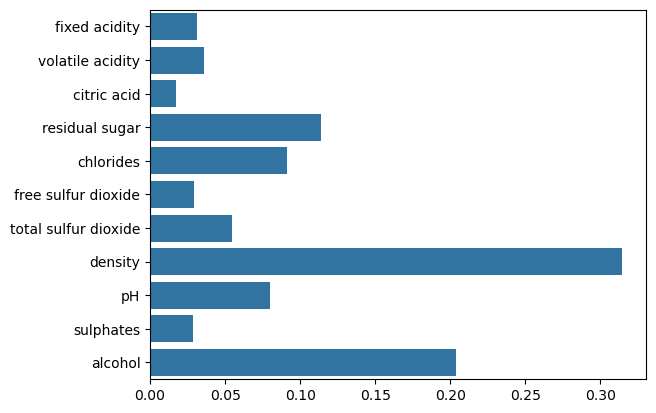

In [87]:
sns.barplot(
    x = RFCModel.feature_importances_,
    y = RFCModel.feature_names_in_
)

-----------------------------------------

Ensamble Model: Boosting

In [88]:
import xgboost as xgb

In [90]:
XGBModel = xgb.XGBRFClassifier()

XGBModel.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [91]:
y_pred = XGBModel.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        84
           1       0.95      0.95      0.95        20

    accuracy                           0.98       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.98      0.98      0.98       104

